In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

sns.set_style('whitegrid')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()
print("-" * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

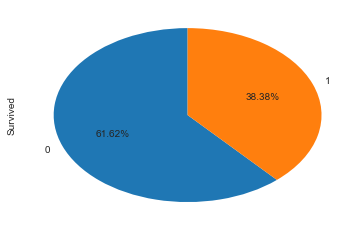

In [4]:
train_data['Survived'].value_counts().plot.pie(labeldistance = 1.1,autopct = '%1.2f%%',
                                               shadow = False,startangle = 90,pctdistance = 0.6)

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

In [5]:
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values
#replace missing value with U0
train_data['Cabin'] = train_data.Cabin.fillna('U0')    
#train_data.Cabin[train_data.CAbin.isnull()]='U0'

In [6]:
from sklearn.ensemble import RandomForestRegressor

#choose training data to predict age
age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]

# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['Age'].isnull(), ['Age']]= predictAges

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
print(train_data.groupby(['Sex','Survived'])['Survived'].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


In [9]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


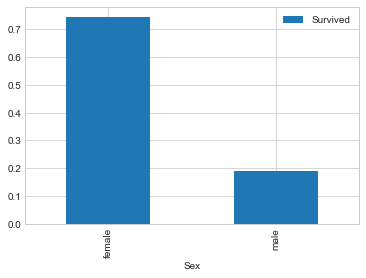

In [10]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

In [11]:
print(train_data.groupby(['Pclass','Survived'])['Pclass'].count())

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64


In [12]:
print(train_data[['Pclass','Survived']].groupby(['Pclass']).mean())

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


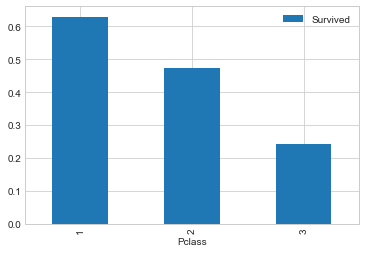

In [13]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

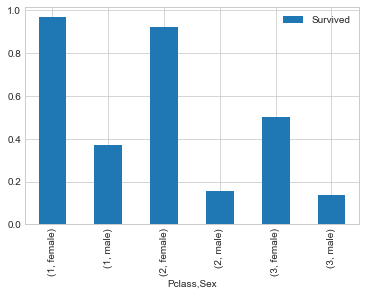

In [14]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [15]:
print(train_data.groupby(['Sex','Pclass','Survived'])['Survived'].count())

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64


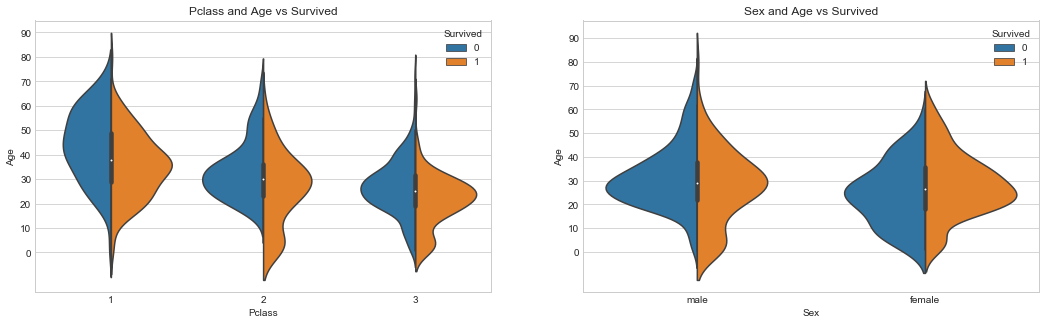

In [16]:
fig,ax = plt.subplots(1,2, figsize = (18,5))
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Pclass","Age",hue="Survived",data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived') 

ax[1].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
 
plt.show()

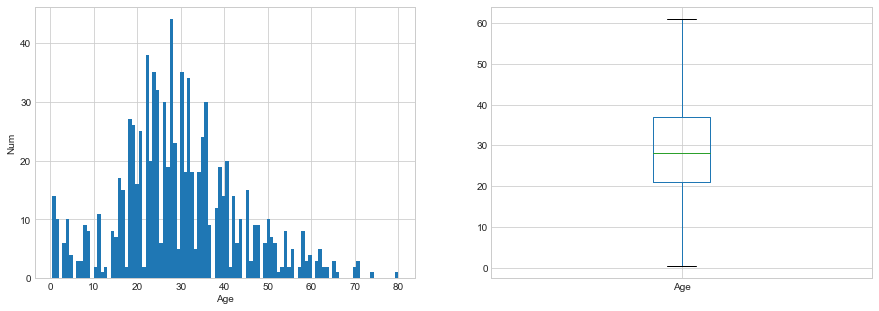

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
train_data['Age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Num')
 
plt.subplot(1,2,2)
train_data.boxplot(column='Age',showfliers=False)
plt.show()

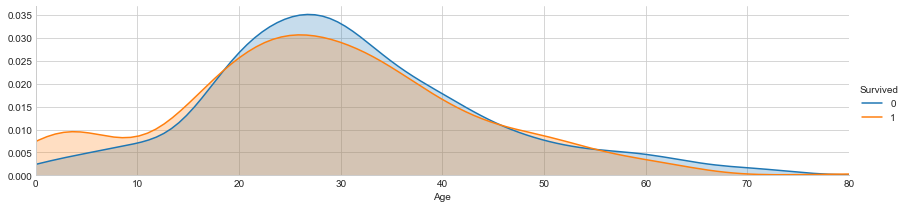

In [18]:
facet = sns.FacetGrid(train_data,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()

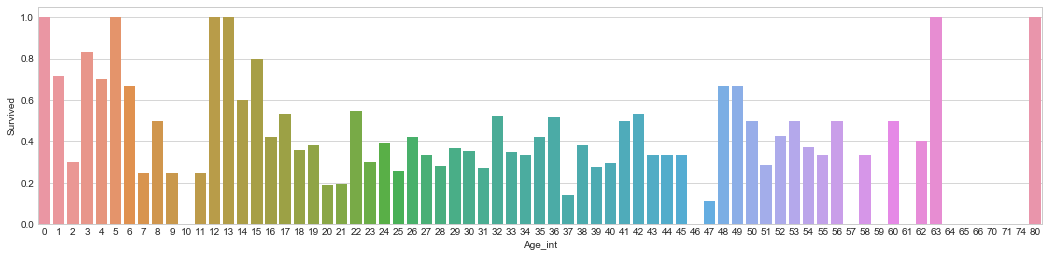

In [19]:
# average survived passengers by age
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Age_int'] = train_data['Age'].astype(int)
average_age = train_data[["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()
sns.barplot(x='Age_int',y='Survived',data=average_age)

In [20]:
print(train_data['Age'].describe())

count    891.000000
mean      29.657752
std       13.731480
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


In [21]:
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'],bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
print(by_age)

Age_group
(0, 12]      0.506173
(12, 18]     0.480519
(18, 65]     0.362759
(65, 100]    0.125000
Name: Survived, dtype: float64


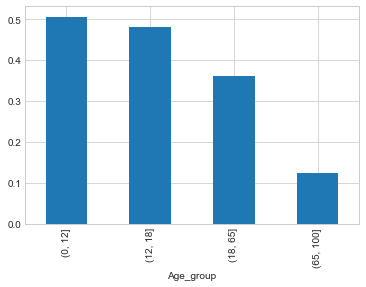

In [22]:
by_age.plot(kind = 'bar')

In [23]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


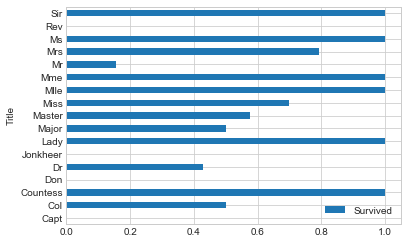

In [24]:
train_data[['Title','Survived']].groupby(['Title']).mean().plot.barh()

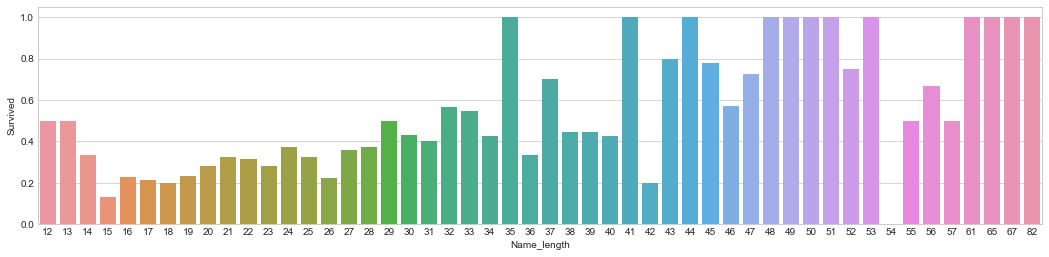

In [25]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby(['Name_length'], as_index=False).mean()
sns.barplot(x='Name_length', y='Survived',data=name_length)

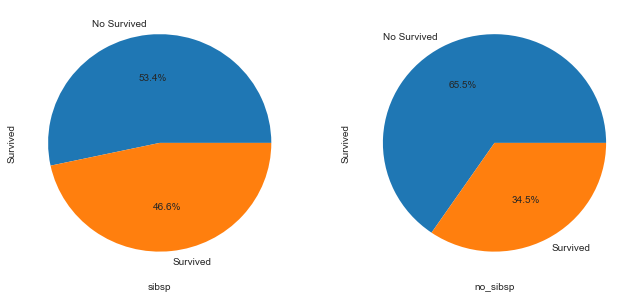

In [26]:
#将数据分为有兄弟姐妹和没有兄弟姐妹的两组：
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%')
plt.xlabel('sibsp')
 
plt.subplot(1,2,2)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%')
plt.xlabel('no_sibsp')
 
plt.show()

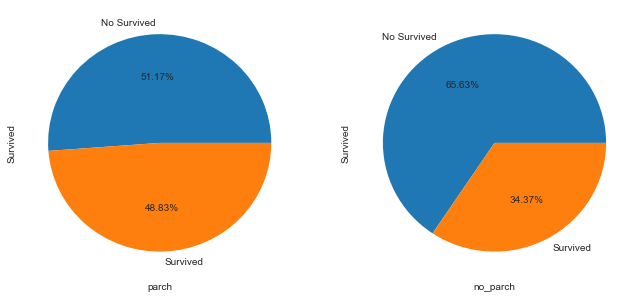

In [27]:
parch_df = train_data[train_data['Parch'] != 0]  
no_parch_df = train_data[train_data['Parch'] == 0]  
 
plt.figure(figsize=(11,5))  
plt.subplot(1,2,1)  
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct= '%1.2f%%')  
plt.xlabel('parch')  
 
plt.subplot(1,2,2)  
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.2f%%')  
plt.xlabel('no_parch') 
 
plt.show()  

Text(0.5,1,'SibSp and Survived')

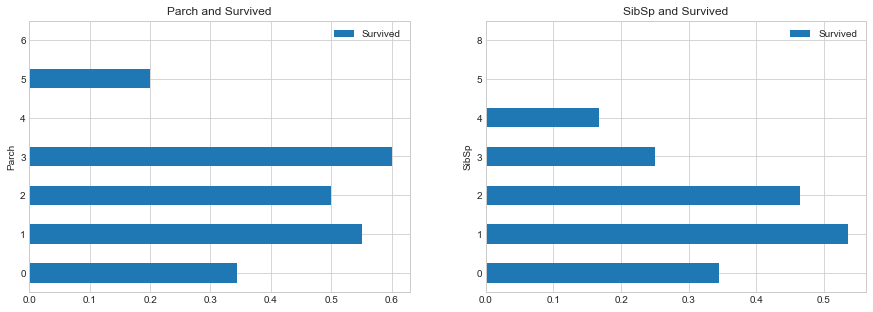

In [28]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.barh(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.barh(ax=ax[1])
ax[1].set_title('SibSp and Survived')

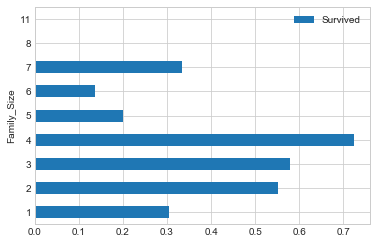

In [29]:
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp']+1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.barh()

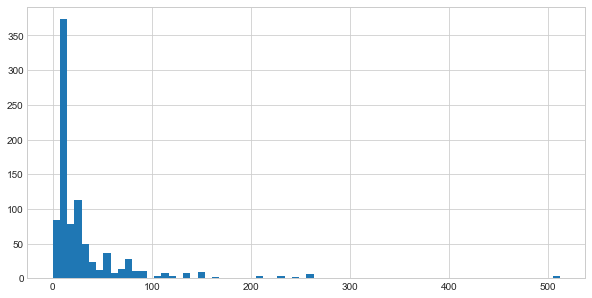

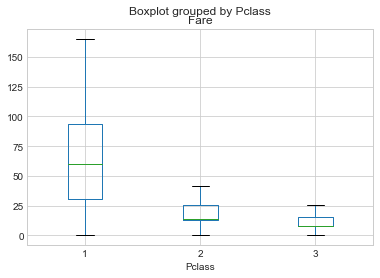

In [30]:
plt.figure(figsize=(10,5))
train_data['Fare'].hist(bins=70)
 
train_data.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

In [31]:
print(train_data['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


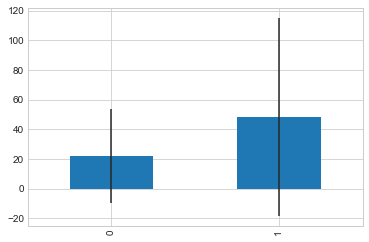

In [32]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]
 
average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
average_fare.plot(yerr=std_fare,kind='bar',legend=False)
 
plt.show()

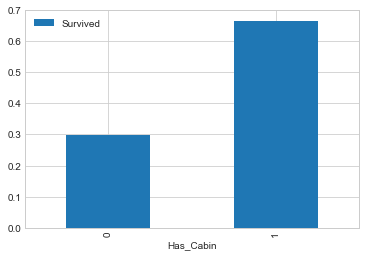

In [33]:
# Replace missing values with "U0"
train_data.loc[train_data.Cabin.isnull(),'Cabin'] = 'U0'
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()

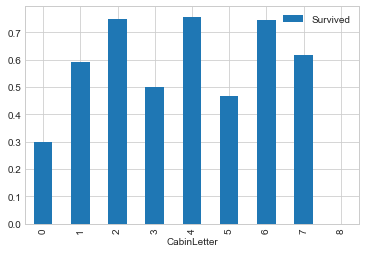

In [34]:
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]
train_data[['CabinLetter','Survived']].groupby(['CabinLetter']).mean().plot.bar()


Text(0.5,1,'Embarked and Survived')

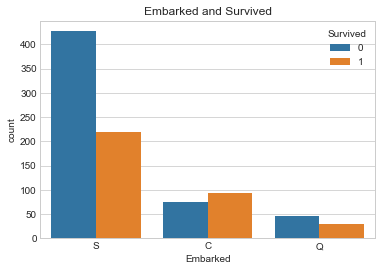

In [35]:
sns.countplot('Embarked',hue='Survived',data=train_data)
plt.title('Embarked and Survived')

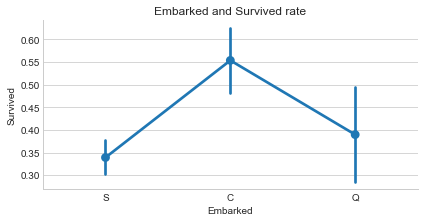

In [36]:
sns.factorplot('Embarked','Survived',data = train_data, size=3, aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

In [37]:
embark_dummies = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'], axis=1, inplace=True)

embark_dummies = train_data[['S','C','Q']]
embark_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [38]:
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

train_data[['Cabin','CabinLetter']].head()

,Cabin,CabinLetter
0,U0,0
1,C85,1
2,U0,0
3,C123,1
4,U0,0


In [52]:
from sklearn import preprocessing
 
assert np.size(train_data['Age']) == 891
# StandardScaler will subtract the mean from each value then scale to the unit varience
scaler = preprocessing.StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape(-1,1))

In [53]:
print(train_data['Age_scaled'].head())

0   -0.557992
1    0.607868
2   -0.266527
3    0.389270
4    0.389270
Name: Age_scaled, dtype: float64


In [54]:
# Divide all fares into quartiles
train_data['Fare_bin'] = pd.qcut(train_data['Fare'],5)
print(train_data['Fare_bin'].head())

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]


In [55]:
# qcut() create a new variable that idetifies the quartile range, but we can't use the string
# so either factorize or create dummies from the result
 
# factorize
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]
 
# dummies
fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))
train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)

In [58]:
train_df_org = pd.read_csv('titanic_train.csv')
test_df_org = pd.read_csv('titanic_test.csv')
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)   #891+418=1309rows, 12columns
PassengerId = test_df_org['PassengerId']

In [59]:
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace=True)